In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

from matplotlib.ticker import AutoMinorLocator


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size
1424158,2020-10-16,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,5,app_android,1,30.0,0.0,127.0,-1.522435e+09,...,b'\xe5q\xf1r7\xe6\xc5\x0fEO\xe3\xeee%\xac\xa7p...,"b',\xa6XR\x9b\x9dWb\xd2\xa7\xc0s\xa1r\x93{\x9f...",0.134906,Android,0,0.190000,2020-10-16 21:15:20,21,Friday,153600
587083,2020-10-16,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...",b'l\xf5\x89f\x00\xcb\xb0rdO\xcd\xfaN\x8b\xad!Y...,1,web,1,4.0,2.0,10.0,1.972676e+09,...,"b',Uxy;O\x84\xba\xd0\x9f+\xf6\xb9[\x19:\x16\n\...","b',Uxy;O\x84\xba\xd0\x9f+\xf6\xb9[\x19:\x16\n\...",0.078995,Desktop,0,0.010000,2020-10-16 19:54:30,19,Friday,92300
1062511,2020-10-15,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,4.0,0.0,12.0,-1.801153e+09,...,b'\xf7\xcfw\xb3\r\x859\xdb\xb3\xf6\xf3L\xc3*P\...,"b'x""\x8a\x95\xa6,\xfe\x85s\x13\x8eq\xc3c/a\xf9...",0.273097,Desktop,0,0.010000,2020-10-15 19:53:00,19,Thursday,72000
1303552,2020-10-14,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,4.0,1.0,12.0,-2.327217e+08,...,b'#q\xbf\xc6\xab\xbe\xd9\x8b\xe5\xc8o\x102-l\x...,b'\x9e\xbb\xfa[1\xccr\xee\x06\xfb;a\x06\xe4\x1...,0.273522,Desktop,0,1.525000,2020-10-14 14:54:50,14,Wednesday,0
51641,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,6,web,1,4.0,2.0,12.0,-3.202722e+08,...,"b""'\xc3f\x8e\x86\xbb&\x86\xd8\x1eW$E03-\x98\xd...",b'\\%=\xedd\xda\xb4-\xb1\xeb\xa8+\x19\xf7c\xe8...,0.586654,Android,0,0.100000,2020-10-19 16:02:10,16,Monday,54720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830470,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",9,web,1,73.0,2.0,127.0,7.277829e+08,...,b'\x98\xc3;\x98\xc4I\xbb;\x95\xaf &T\x86w^\x8b...,b'\xfb`\x12\xfd\x07\x18?\x92)\xb4^\x11\x8d\xed...,0.512843,Android,0,4.694586,2020-10-16 14:22:30,14,Friday,180000
31306,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,web,1,4.0,1.0,12.0,6.575803e+08,...,b'\xc6\x8a\x1a\xe4D\xb1\xe9\x8f\x82\xf7\x0f\x0...,b'\x0e\x81\x1dNu\x1fV \x8d\xae\x1cK_\x84\xdb\x...,0.529218,Android,0,1.115000,2020-10-19 17:41:50,17,Monday,65520
1212981,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,8,web,1,74.0,0.0,127.0,-2.327217e+08,...,b'\x16\x86\x1d\x1b\xeem\xa7\xba\xc1I\n\xc9\x17...,b'\x82@\x0f\xa4\xb8Q\xad\xec\xdd$\x1d\xf7\xe1v...,0.603344,Desktop,0,0.435972,2020-10-16 20:47:30,20,Friday,0
201285,2020-10-18,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",8,web,1,73.0,0.0,127.0,-1.704080e+08,...,"b'\x7fV\x12\x9d\x8c\x0b}\x02\xdca""\xdb\xfd\xff...",b'%\xb6\xd9\xea\xcd\xcd\xb6\xec\xa1Bt^\xec\xe2...,0.521959,Android,0,0.632517,2020-10-18 21:26:10,21,Sunday,32000


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

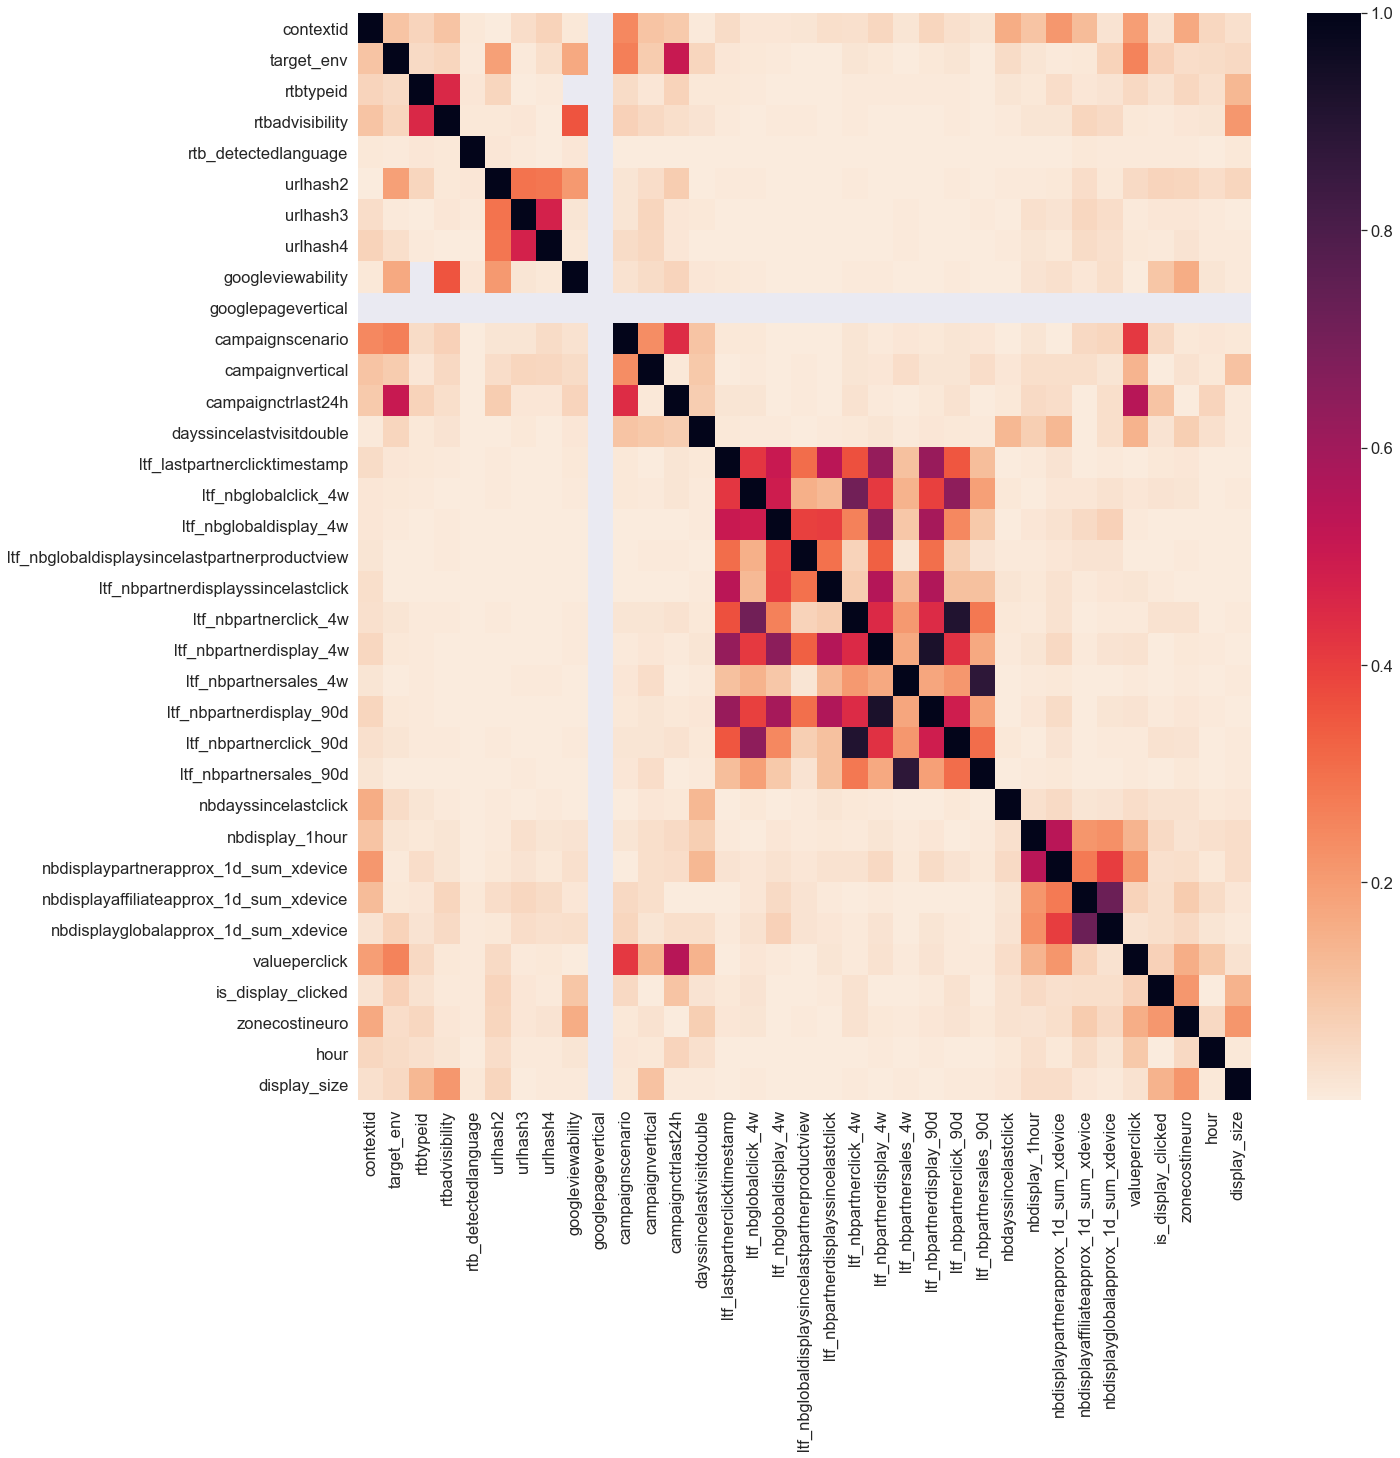

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

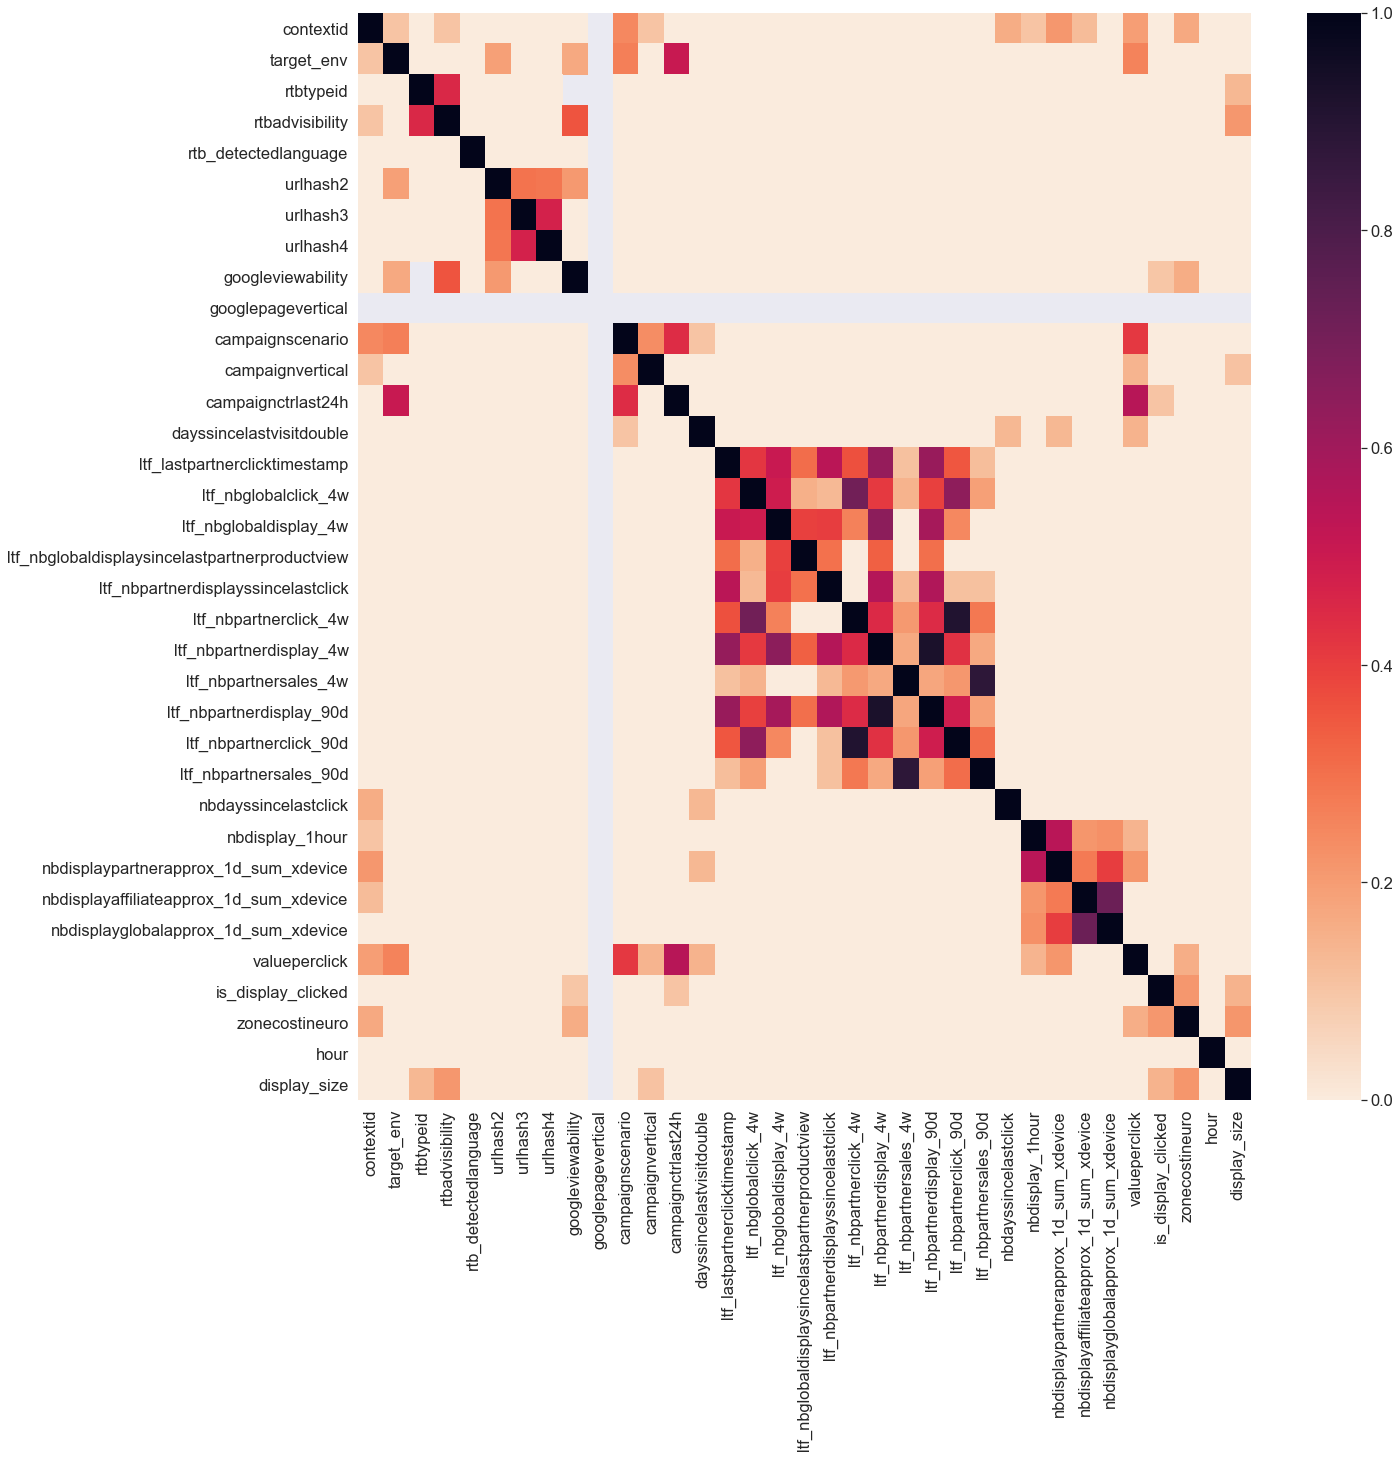

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.1 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(serie, n=10, moyenne=True):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie))
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = var_min + (j+0.5)*pas if moyenne else j
    return discrete_var

In [7]:
def ratio_plot(variable, zoom=False):
    """
    Trace la proportion de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    ratio.plot(ax=ax, marker='o')
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title(f"Proportion de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()
    plt.style.use('default')

In [8]:
def ratios_plot(variables):
    """
    Trace sur un même graphique les proportion de clics selon les variables de
    la liste 'variables' dans df.
    """
    ratios = []
    mini = float('inf')
    maxi = - float('inf')
    for variable in variables:
        clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
        notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
        ratio = clicked / (clicked + notclicked)
        m, M = ratio.min(), ratio.max()
        if m < mini:
            mini = m
        if M > maxi:
            maxi = M
        ratios.append(ratio)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=0)
    
    ax.set_ylim(mini - 0.05*(maxi-mini), maxi + 0.05*(maxi-mini))
    
    for i, ratio in enumerate(ratios):
        ratio.plot(ax=ax, label=variables[i], marker='x', legend=True)
    
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title("Proportion de clics en fonction des variables")
    ax.set_xlabel("Modalités croissantes des variables")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()

In [9]:
def stacked_barplot(variable):
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    total = df.groupby(variable).count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(variable)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()
    plt.style.use('default')

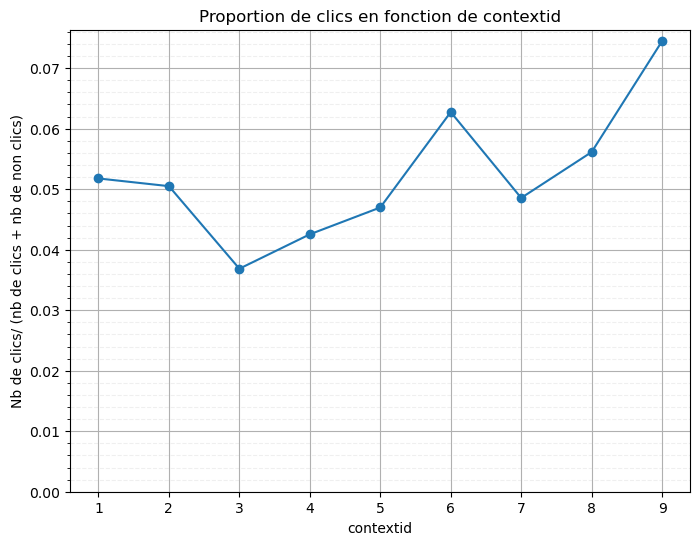

In [10]:
ratio_plot("contextid")

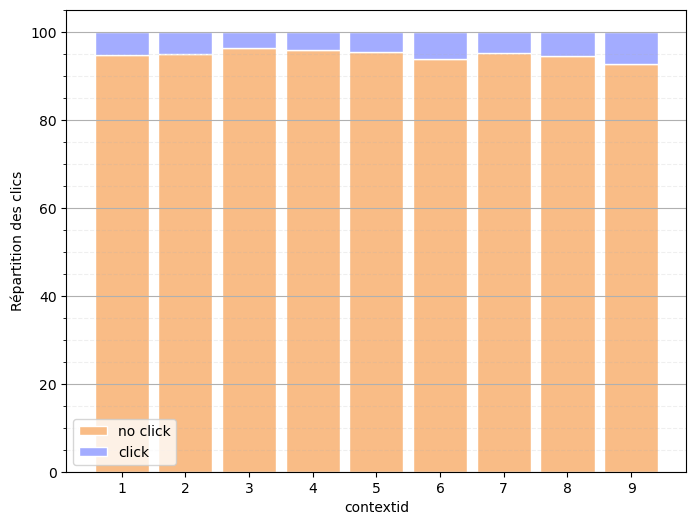

In [11]:
stacked_barplot('contextid')

  0%|          | 0/1610494 [00:00<?, ?it/s]

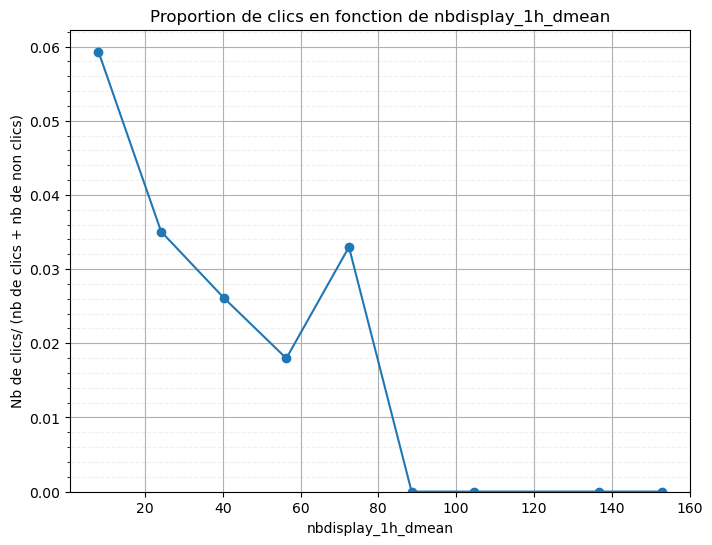

Wall time: 25.3 s


In [12]:
%%time
df["nbdisplay_1h_dmean"] = to_discrete(df["nbdisplay_1hour"], moyenne=True)
ratio_plot("nbdisplay_1h_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

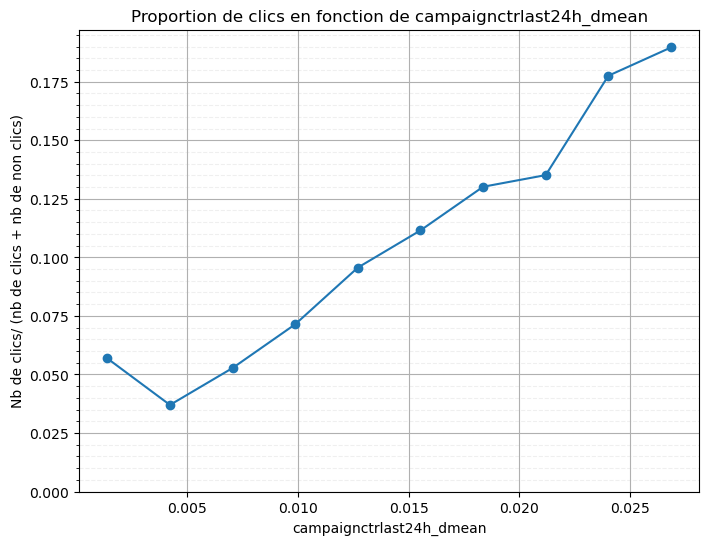

Wall time: 46 s


In [13]:
%%time
df["campaignctrlast24h_dmean"] = to_discrete(df["campaignctrlast24h"], moyenne=True)
ratio_plot("campaignctrlast24h_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

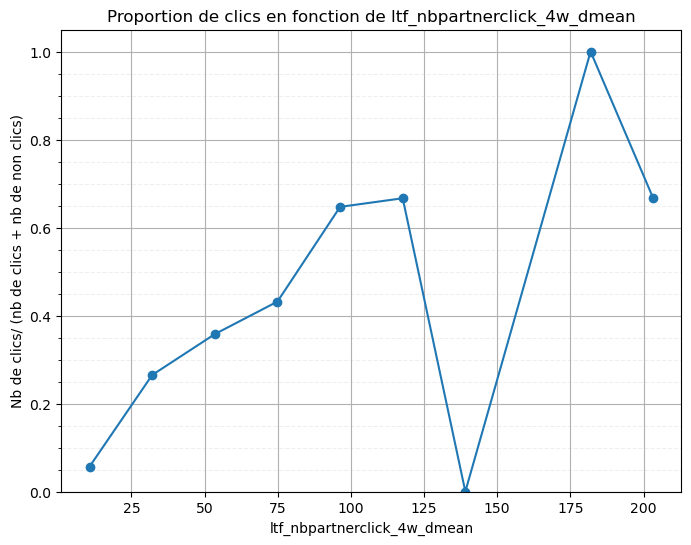

In [14]:
df["ltf_nbpartnerclick_4w_dmean"] = to_discrete(df["ltf_nbpartnerclick_4w"], moyenne=True)
ratio_plot("ltf_nbpartnerclick_4w_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

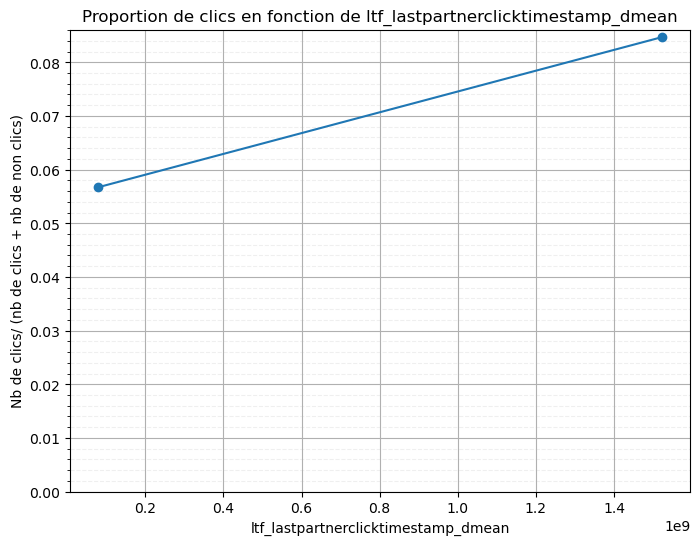

In [15]:
df["ltf_lastpartnerclicktimestamp_dmean"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=True)
ratio_plot("ltf_lastpartnerclicktimestamp_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

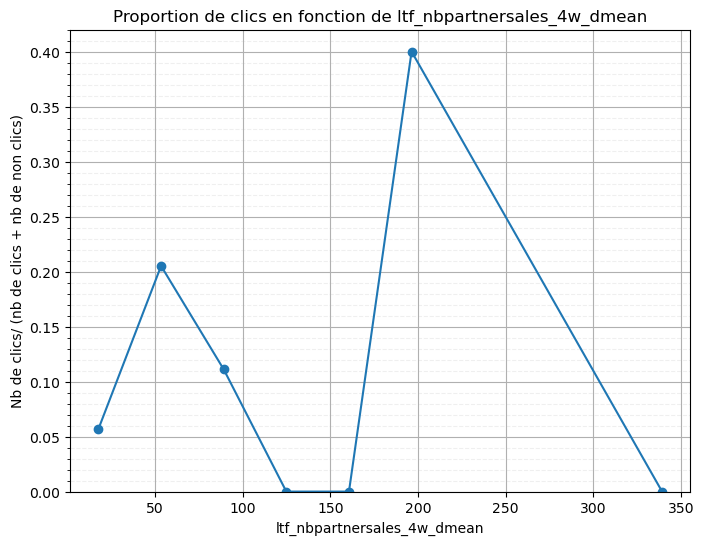

In [16]:
df["ltf_nbpartnersales_4w_dmean"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=True)
ratio_plot("ltf_nbpartnersales_4w_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

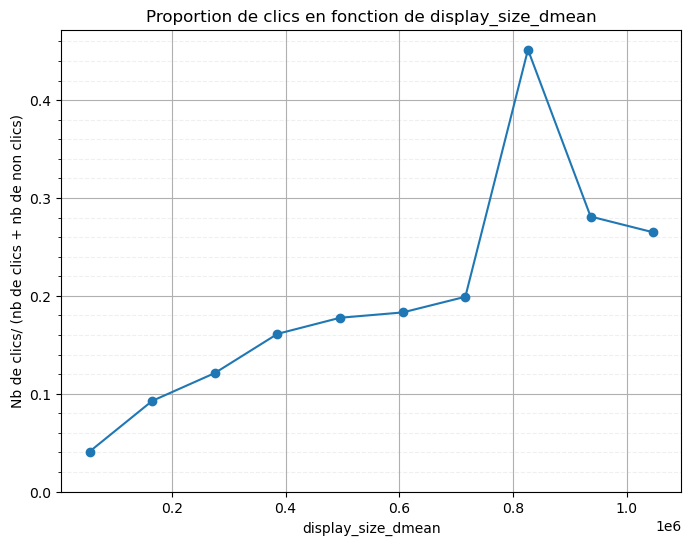

In [17]:
df["display_size_dmean"] = to_discrete(df["display_size"], moyenne=True)
ratio_plot("display_size_dmean")

In [18]:
%%time
df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
df['dayssincelastvisitdouble_d'] = to_discrete(df["dayssincelastvisitdouble"], moyenne=False)
df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
df["nbdayssincelastclick_d"] = to_discrete(df["nbdayssincelastclick"], moyenne=False)
df["nbdisplay_1hour_d"] = to_discrete(df["nbdisplay_1hour"], moyenne=False)
df["valueperclick_d"] = to_discrete(df["valueperclick"], moyenne=False)
df["zonecostineuro_d"] = to_discrete(df["zonecostineuro"], moyenne=False)
df["display_size_d"] = to_discrete(df["display_size"], moyenne=False)

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

Wall time: 5min 26s


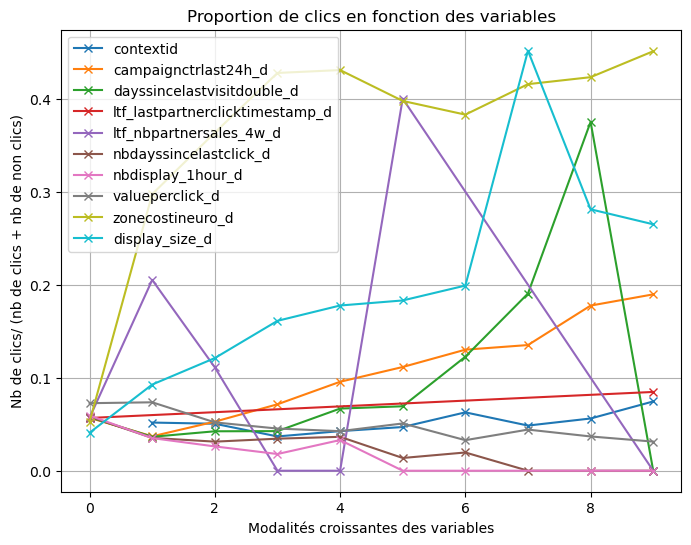

In [19]:
ratios_plot(['contextid', 
             'campaignctrlast24h_d', 
             'dayssincelastvisitdouble_d', 
             'ltf_lastpartnerclicktimestamp_d', 
             'ltf_nbpartnersales_4w_d', 
             'nbdayssincelastclick_d', 
             'nbdisplay_1hour_d', 
             'valueperclick_d', 
             'zonecostineuro_d', 
             'display_size_d'])

In [20]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

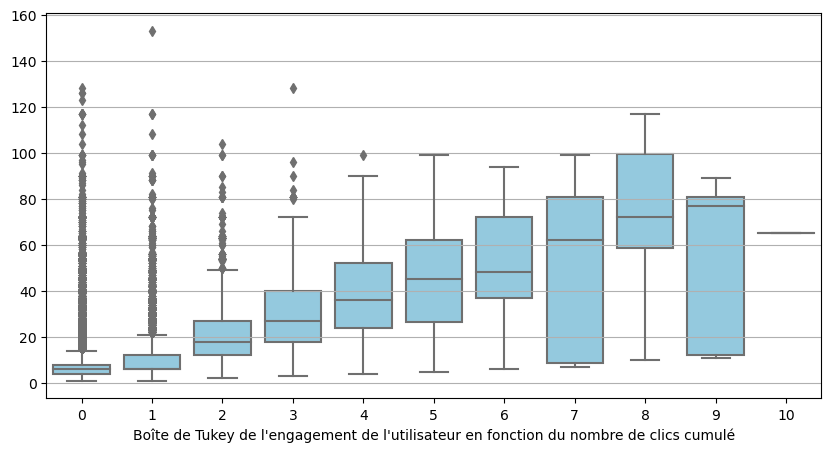

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

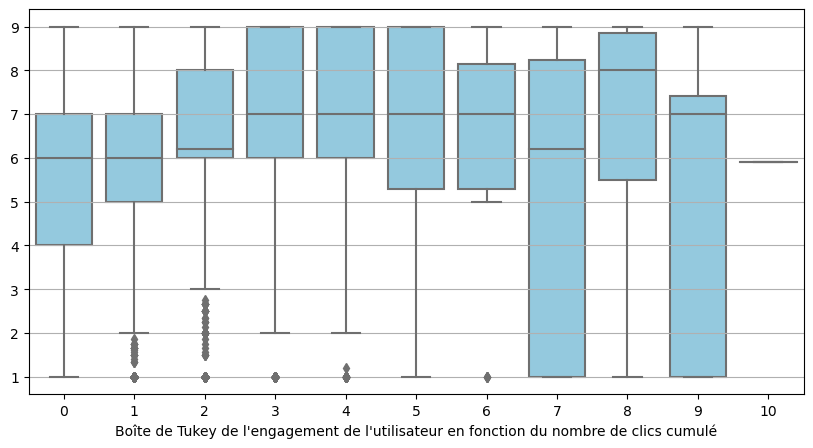

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

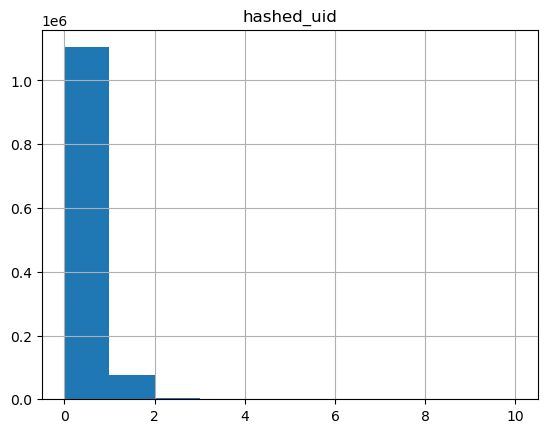

In [26]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

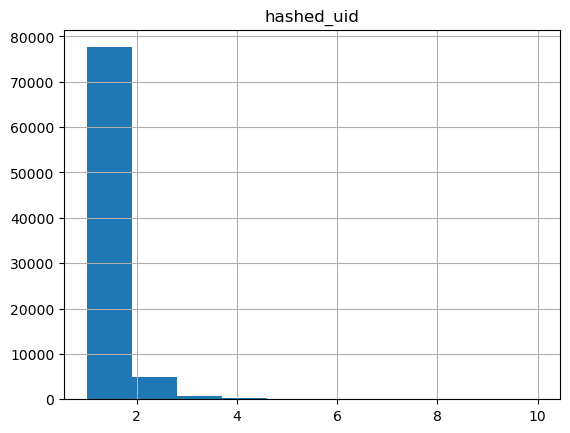

In [27]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

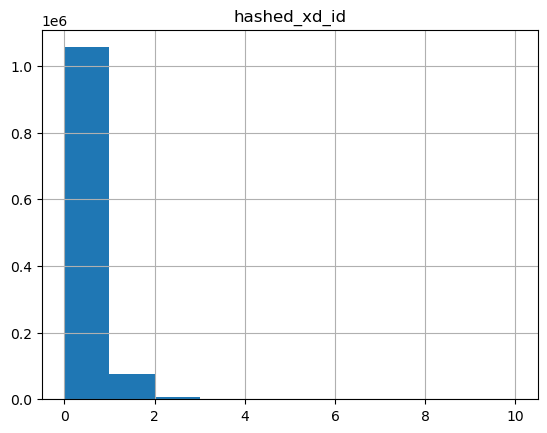

In [28]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

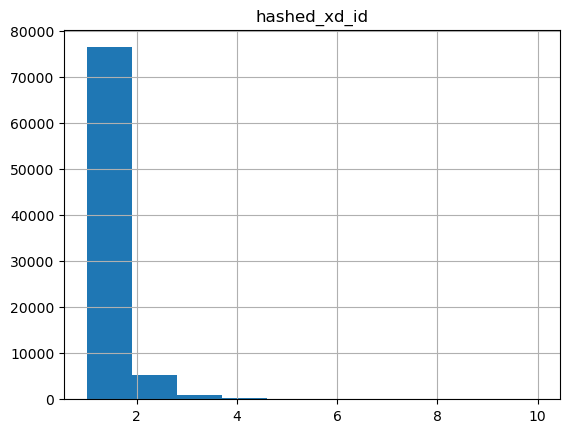

In [29]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Timestamp

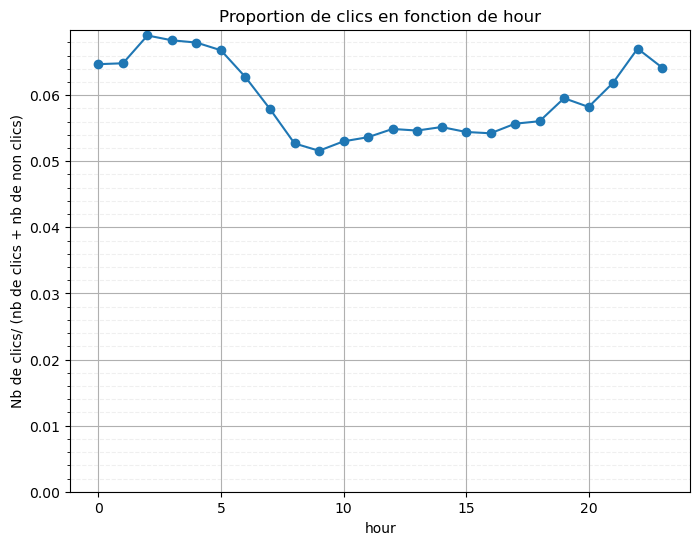

In [31]:
ratio_plot("hour")

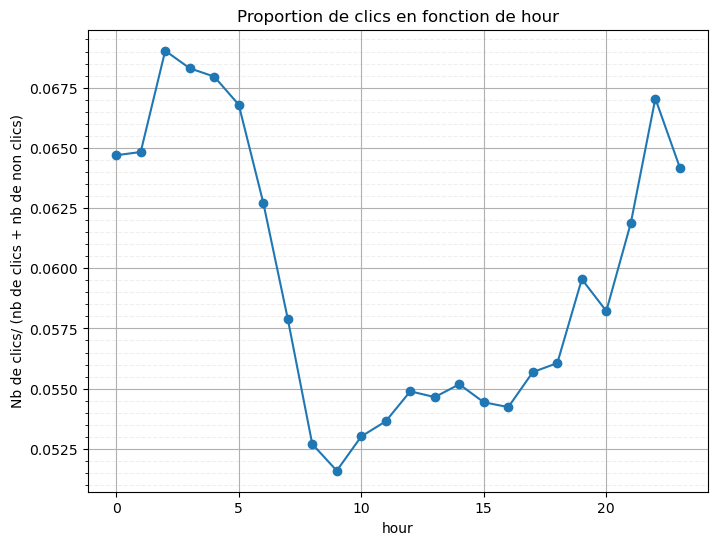

In [32]:
ratio_plot("hour", zoom=True)

In [33]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,display_size_dmean,campaignctrlast24h_d,dayssincelastvisitdouble_d,ltf_lastpartnerclicktimestamp_d,ltf_nbpartnersales_4w_d,nbdayssincelastclick_d,nbdisplay_1hour_d,valueperclick_d,zonecostineuro_d,display_size_d
1424158,2020-10-16,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,5,app_android,1,30.0,0.0,127.0,-1.522435e+09,...,165240.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
587083,2020-10-16,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...",b'l\xf5\x89f\x00\xcb\xb0rdO\xcd\xfaN\x8b\xad!Y...,1,web,1,4.0,2.0,10.0,1.972676e+09,...,55080.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1062511,2020-10-15,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,4.0,0.0,12.0,-1.801153e+09,...,55080.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
1303552,2020-10-14,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,4.0,1.0,12.0,-2.327217e+08,...,55080.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
51641,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,6,web,1,4.0,2.0,12.0,-3.202722e+08,...,55080.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


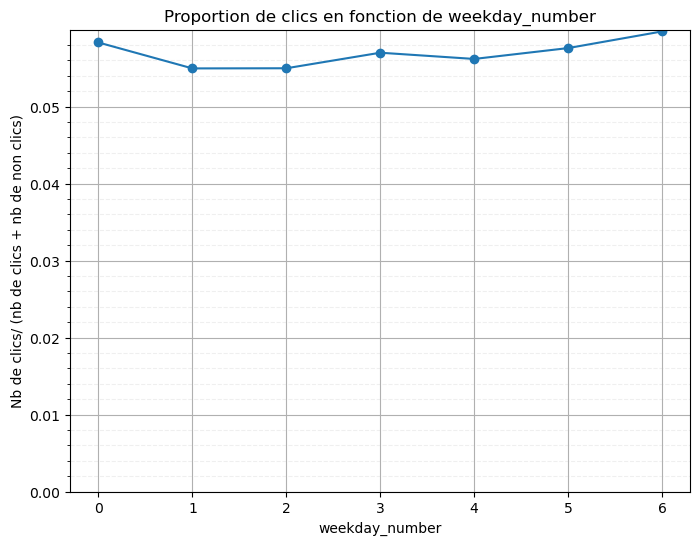

In [34]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

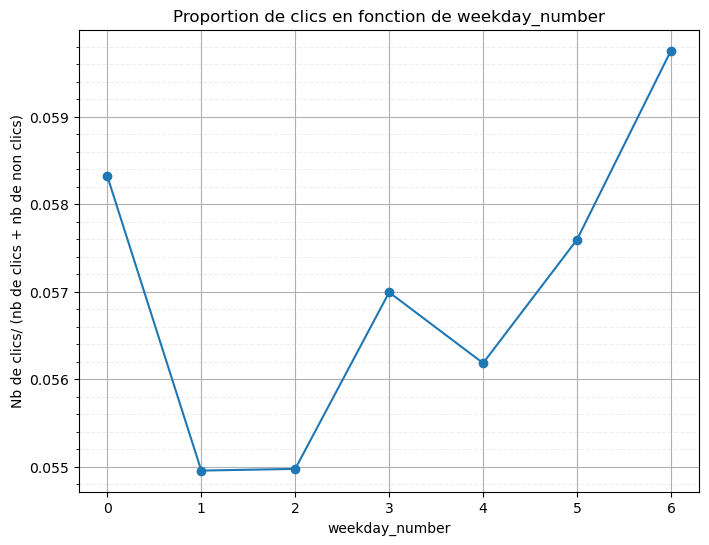

In [35]:
ratio_plot("weekday_number", zoom=True)

In [36]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:10:59
